### Importing required libraries

In [1]:
# importing data processing and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Reading data

In [2]:
# reading weather data of chennai
data = pd.read_csv('data/INCHENAI.txt', names=['Month', 'Day', 'Year', 'Temp'], delim_whitespace=True)
data

,Month,Day,Year,Temp
0,1,1,1995,72.4
1,1,2,1995,73.5
2,1,3,1995,72.6
3,1,4,1995,75.2
4,1,5,1995,74.8
...,...,...,...,...
9261,5,9,2020,90.1
9262,5,10,2020,89.4
9263,5,11,2020,89.5
9264,5,12,2020,87.5


In [3]:
data['TimeStamp'] = data['Day'].map(str) + '-' + data['Month'].map(str) + '-' + data['Year'].map(str)
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], dayfirst=True)
data.head(10)

,Month,Day,Year,Temp,TimeStamp
0,1,1,1995,72.4,1995-01-01
1,1,2,1995,73.5,1995-01-02
2,1,3,1995,72.6,1995-01-03
3,1,4,1995,75.2,1995-01-04
4,1,5,1995,74.8,1995-01-05
5,1,6,1995,76.4,1995-01-06
6,1,7,1995,78.4,1995-01-07
7,1,8,1995,78.6,1995-01-08
8,1,9,1995,78.1,1995-01-09
9,1,10,1995,79.3,1995-01-10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      9266 non-null   int64         
 1   Day        9266 non-null   int64         
 2   Year       9266 non-null   int64         
 3   Temp       9266 non-null   float64       
 4   TimeStamp  9266 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 362.1 KB


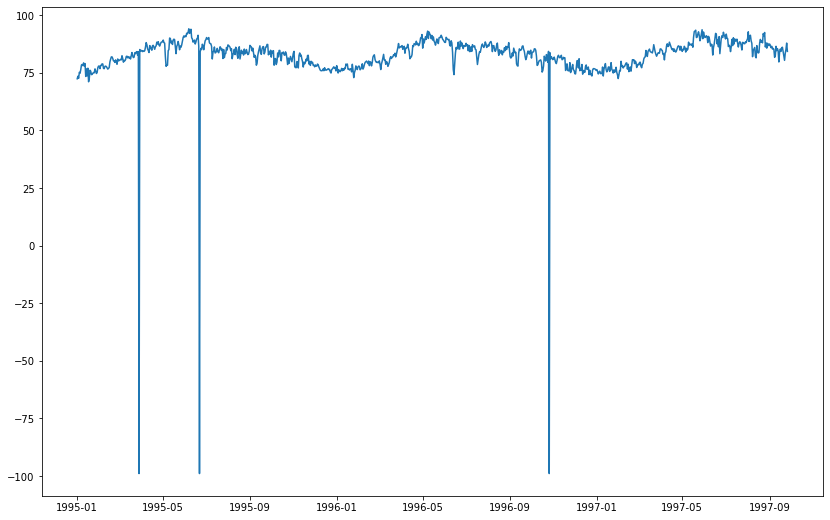

In [5]:
# plotting the dataset
l = 0
r = 1000
plt.figure(figsize=(14, 9))
plt.plot(data['TimeStamp'][l:r], data['Temp'][l:r])

In [6]:
len(data[data['Temp']==-99])

29

In [7]:
# removing null values with the previous time stamp value
for i in data[data['Temp']==-99].index:
    data['Temp'][i] = data['Temp'][i-1]
    

### Plotting data

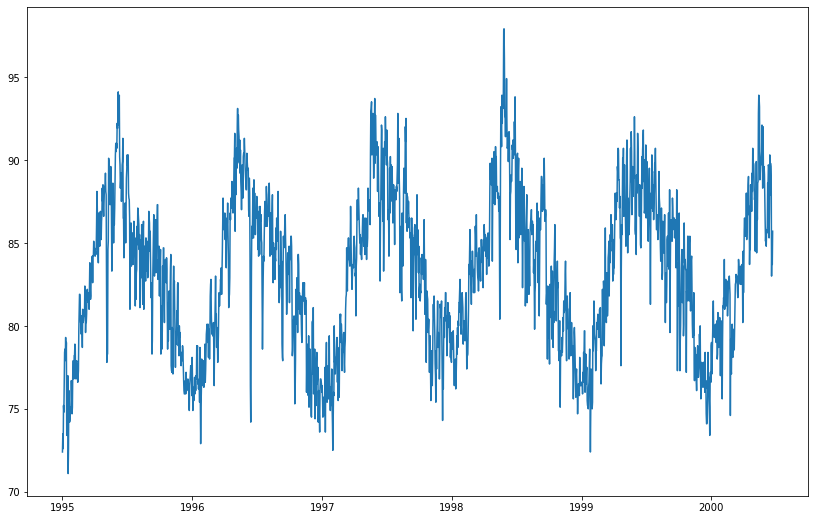

In [12]:
l = 0
r = 2000
plt.figure(figsize=(14, 9))
plt.plot(data['TimeStamp'][l:r], data['Temp'][l:r])

### Decomposing data into trend and seasonality

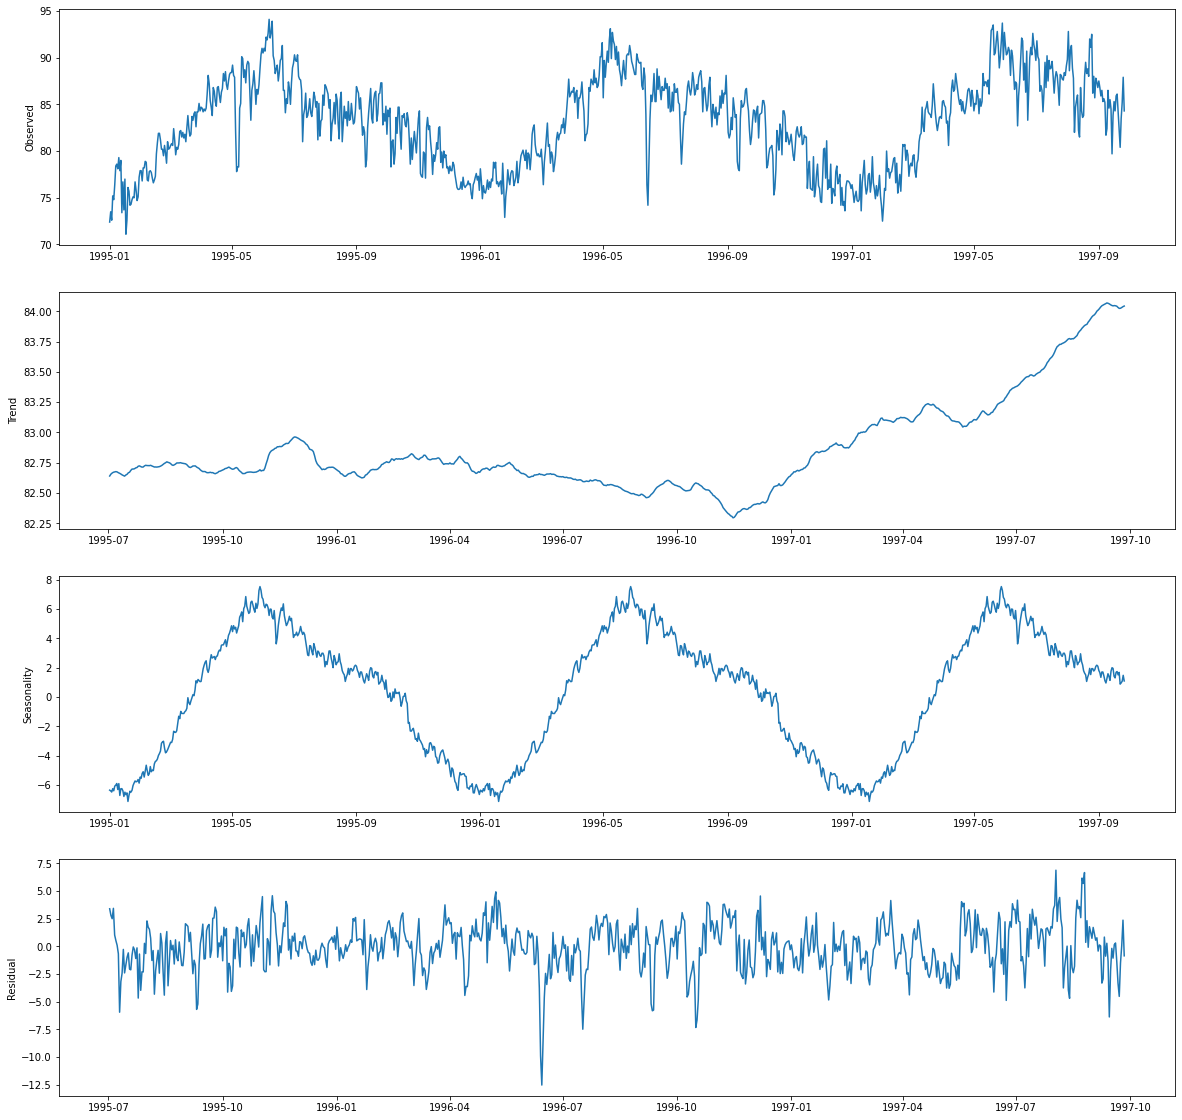

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

l = 0
r = 1000
result = seasonal_decompose(data['Temp'], model='additive', period=365)

x = data['TimeStamp'][l:r]
plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1)
plt.ylabel('Observed')
plt.plot(x, result.observed[l:r])
plt.subplot(4, 1, 2)
plt.ylabel('Trend')
plt.plot(x, result.trend[l:r])
plt.subplot(4, 1, 3)
plt.ylabel('Seasonality')
plt.plot(x, result.seasonal[l:r])
plt.subplot(4, 1, 4)
plt.ylabel('Residual')
plt.plot(x, result.resid[l:r])
plt.show()

### Moving average

In [10]:
# calculating moving average with window 30
data_mean = data['Temp'].rolling(window=30).mean()

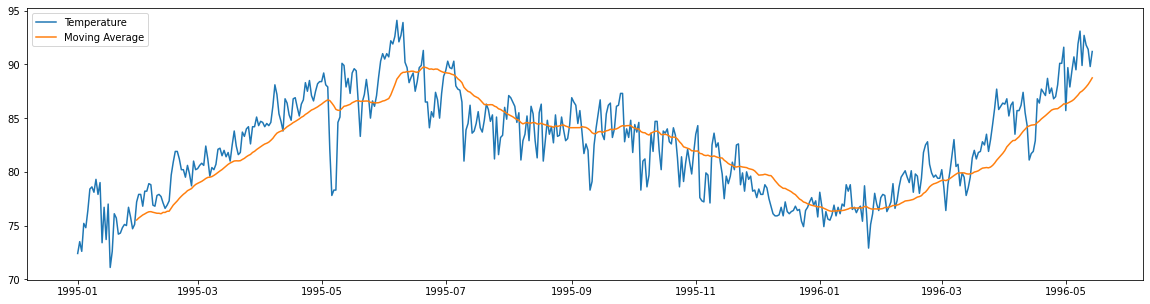

In [11]:
l=0
r=500
plt.figure(figsize=(20, 5))

plt.plot(data['TimeStamp'][l:r], data['Temp'][l:r], label='Temperature')
plt.plot(data['TimeStamp'][l:r], data_mean[l:r], label='Moving Average')
plt.legend()
plt.show()